In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [22]:
%%time
stem = '33E08'
filenames = ['03','05','06', '07', '10', '12', '14', '16']

for file in filenames:
    if file == '03':
        data = pd.read_csv('../data/z24/'+stem+file+'.aaa', sep=' ', nrows=65536, skiprows=2)
        data.columns = [file]
        continue
    temp = pd.read_csv('../data/z24/'+stem+file+'.aaa', sep=' ', nrows=65536, skiprows=2)
    temp.columns = [file]
    data = pd.concat([data, temp], axis=1)

data = data.iloc[:,:]
normalized_data=(data-data.mean())/data.std()

CPU times: user 248 ms, sys: 45 ms, total: 293 ms
Wall time: 207 ms


In [23]:
data.shape

(65536, 8)

In [24]:
#data['cars'] = carsss

array([<matplotlib.axes._subplots.AxesSubplot object at 0x74e3a5dfeef0>,
      dtype=object)

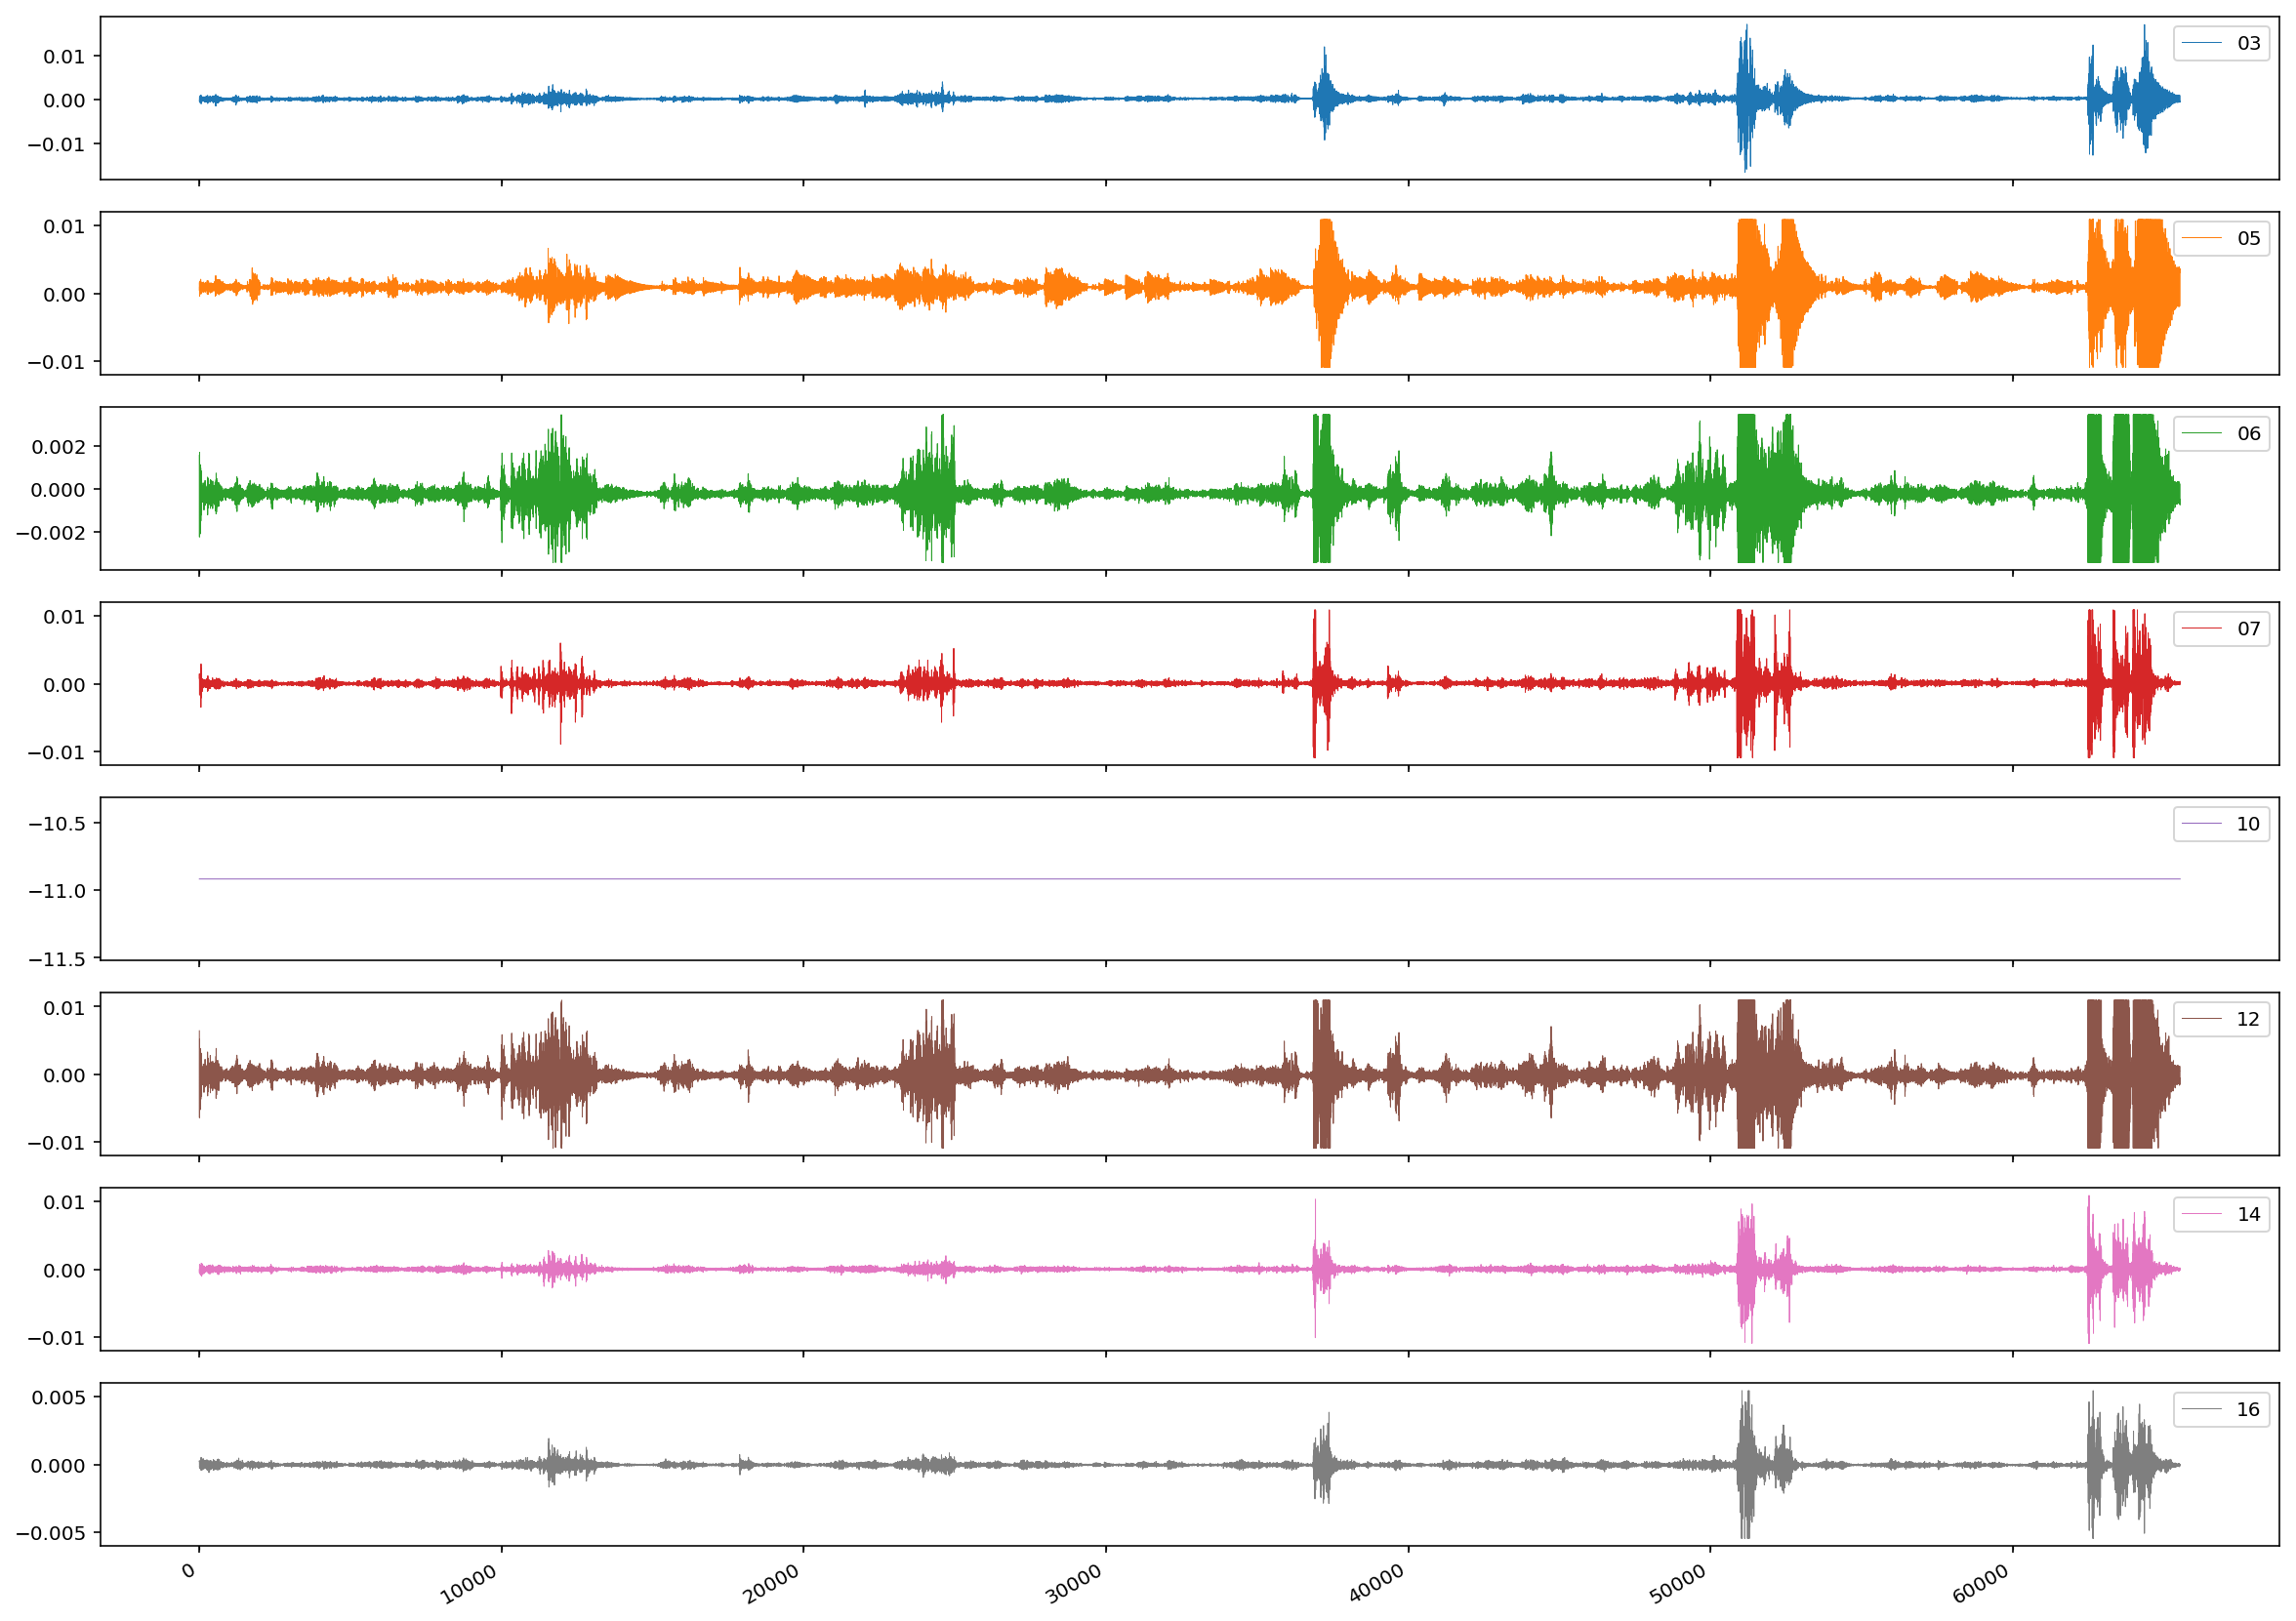

In [25]:
data.plot(subplots=True, alpha=1,figsize=(20,2*8), linewidth=0.5)

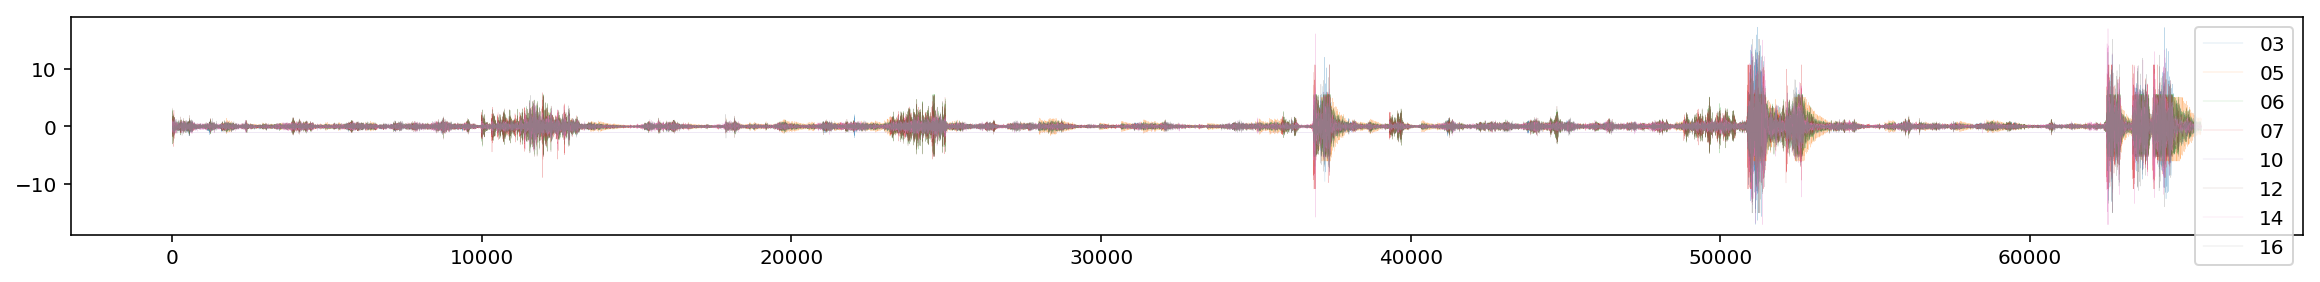

In [26]:
normalized_data.plot(alpha=0.7,figsize=(20,2), linewidth=0.1) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x74e3ad0bccf8>,
      dtype=object)

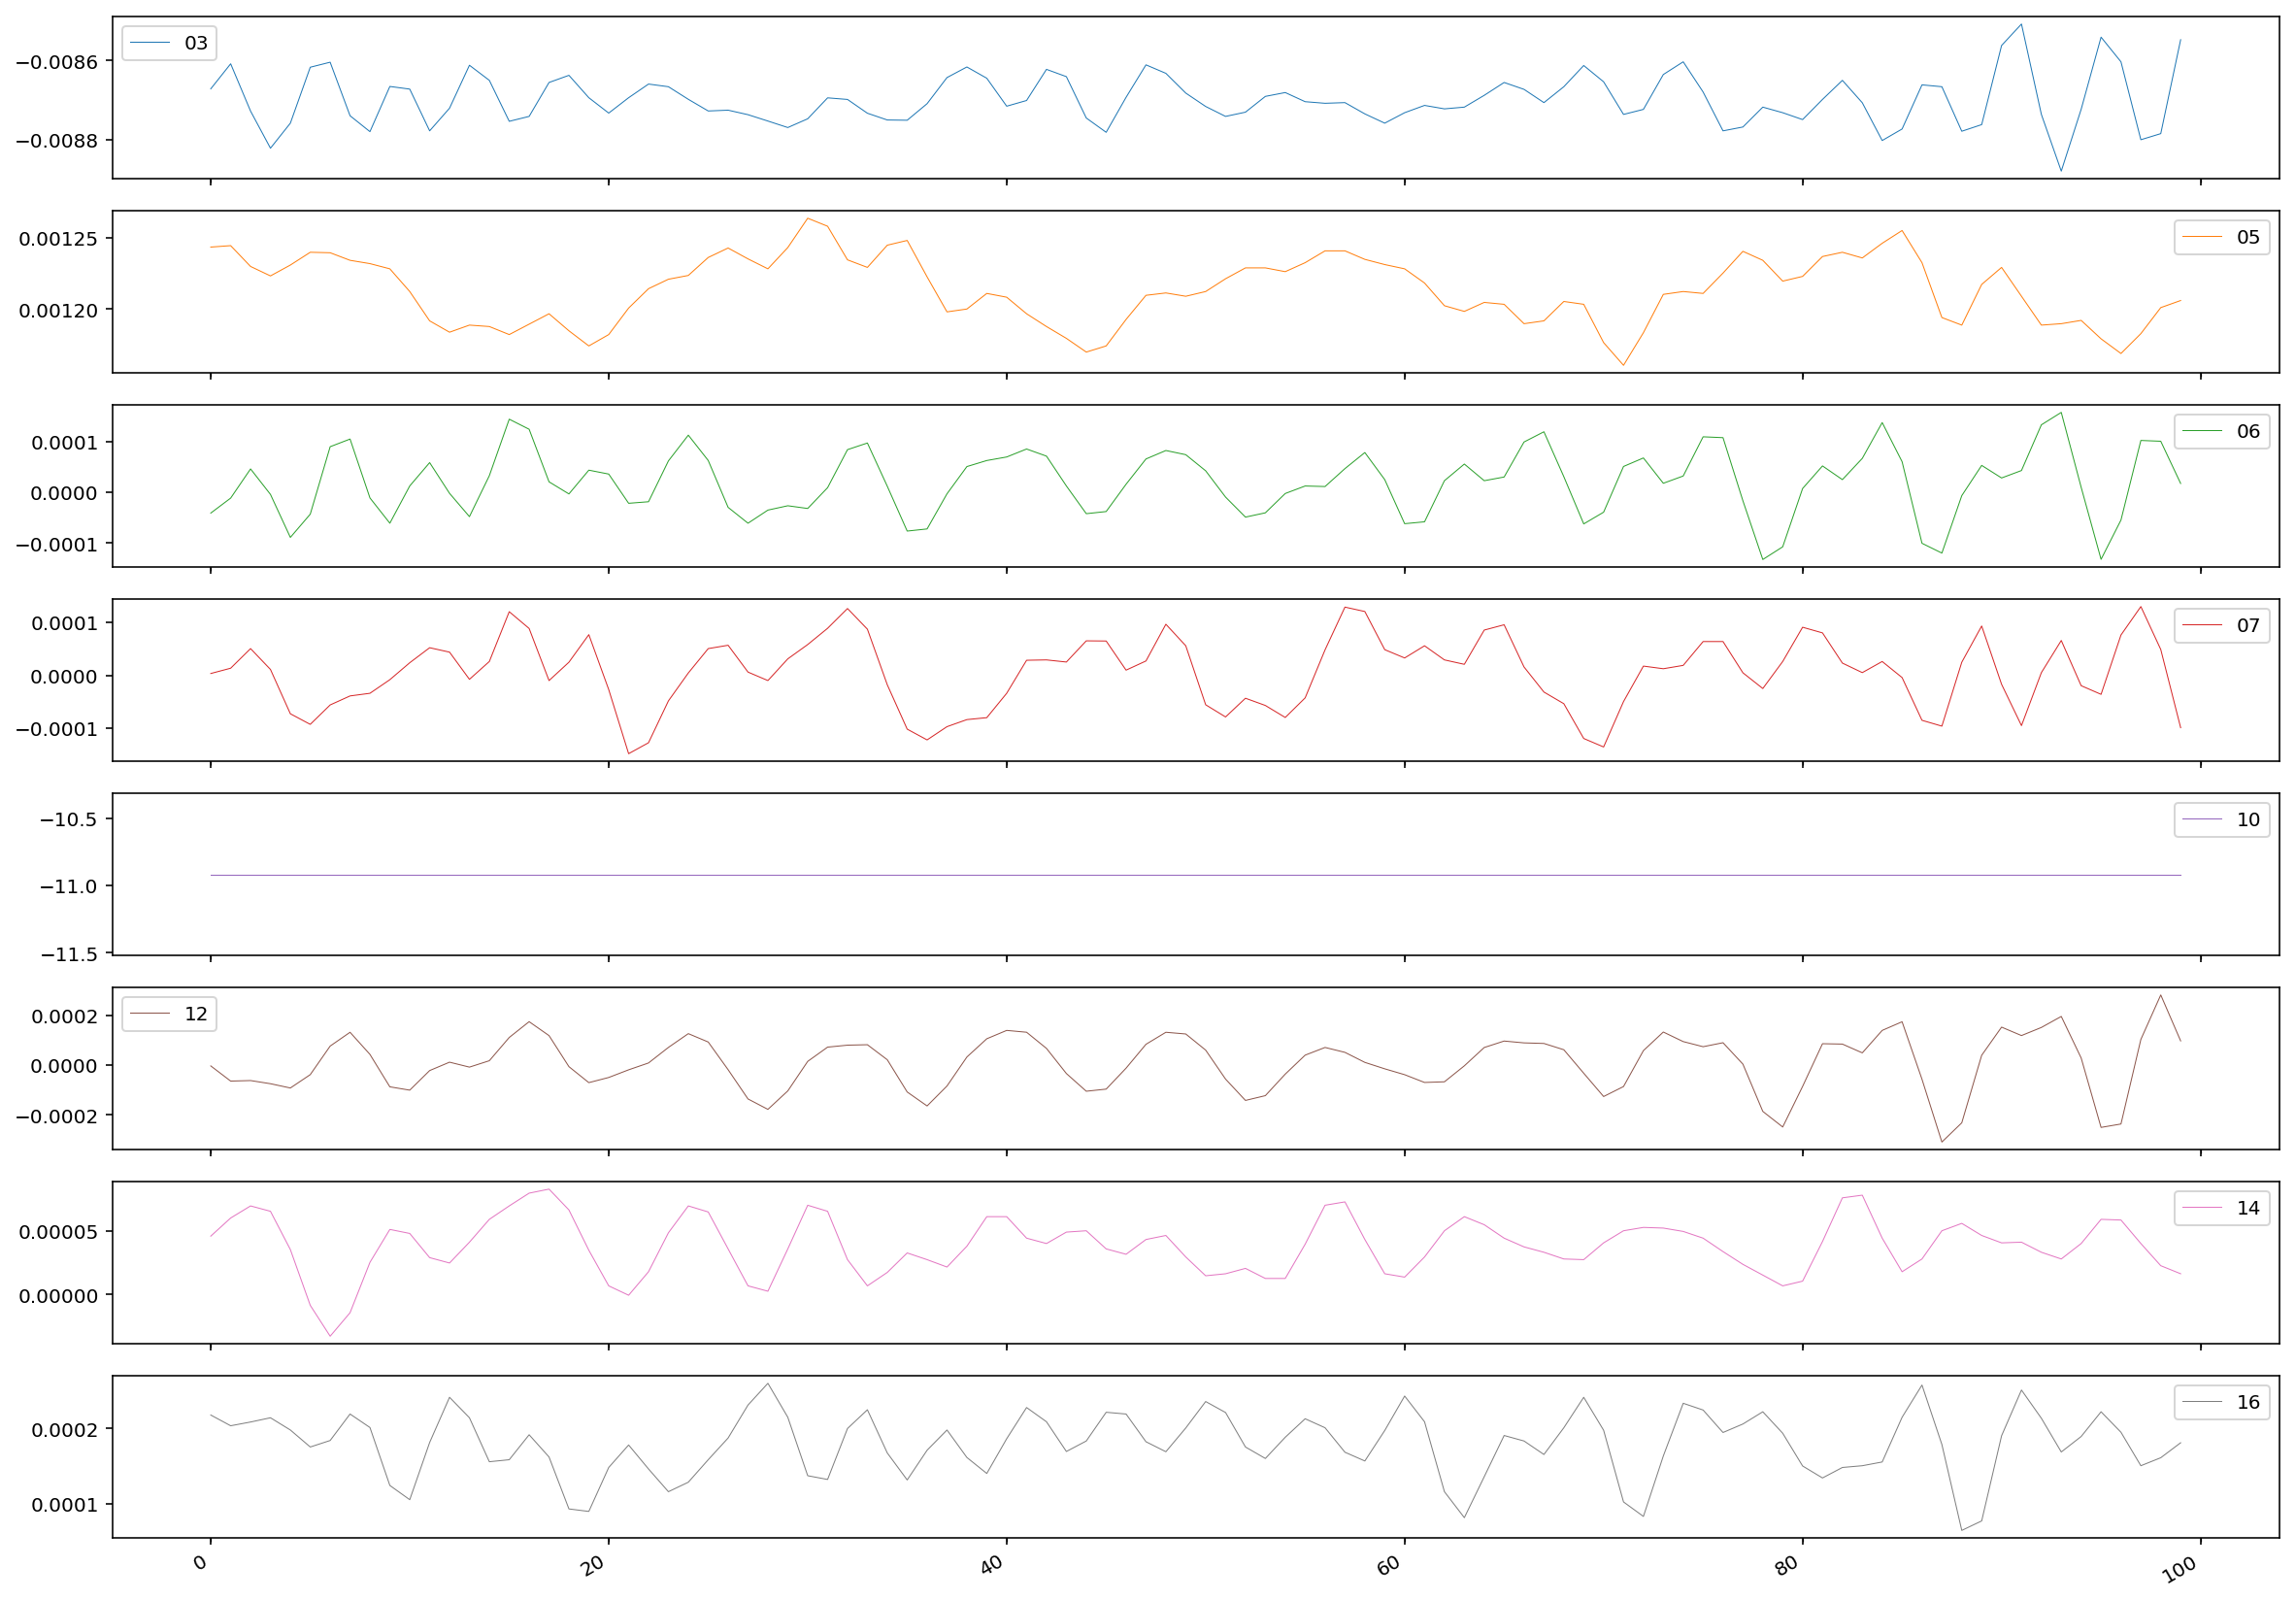

In [12]:
data.iloc[:100,:].plot(subplots=True, alpha=1,figsize=(20,2*8), linewidth=0.5)

# Progressive damage testing

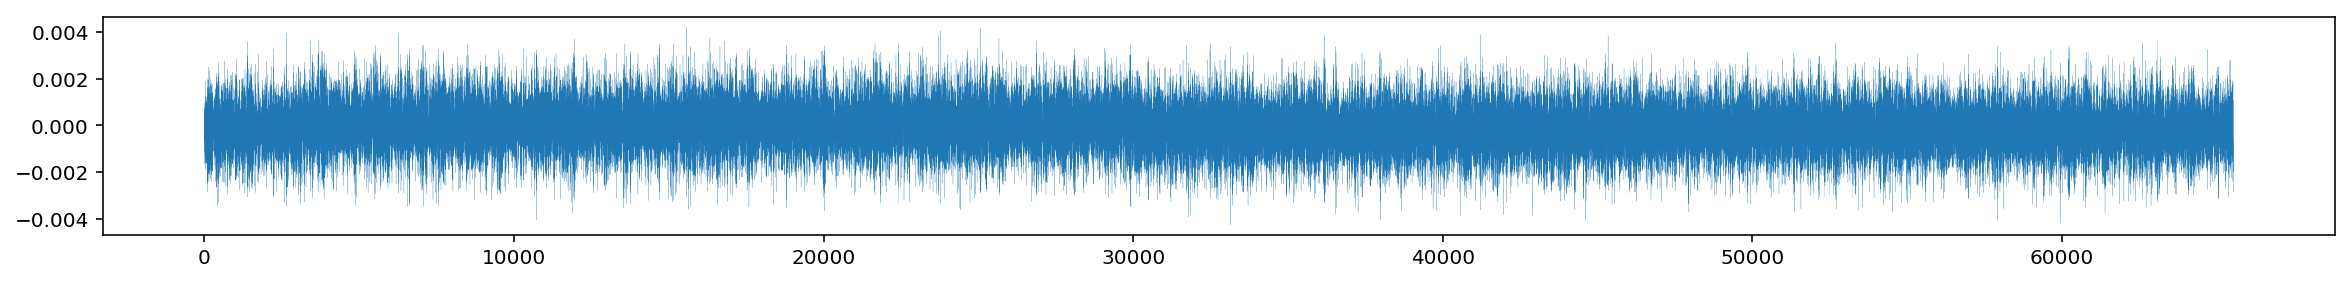

In [7]:
import scipy.io
damage = scipy.io.loadmat(file_name='../data/z24/damage/02/fvt/02setup03.mat')
plt.figure(figsize=(20,2))
plt.plot(damage['data'][:,10], linewidth=0.1)

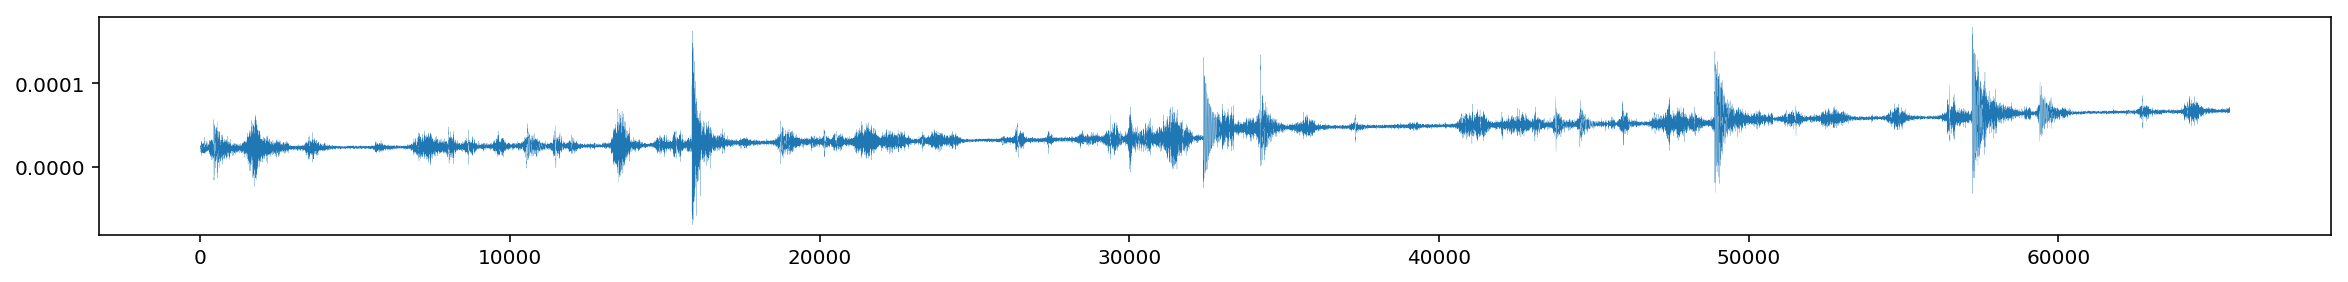

In [8]:
damage = scipy.io.loadmat(file_name='../data/z24/damage/02/avt/02setup03.mat')
plt.figure(figsize=(20,2))
plt.plot(damage['data'][:,10], linewidth=0.1)

In [13]:
data.to_csv('z24_vibrations_damaged.csv',index=False)

In [61]:
env = pd.read_csv('../data/z24/'+stem+'PRE'+'.env', sep='  ', nrows=10, skiprows=1, header=None)

/home/dsteinar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [62]:
env

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.000312,0.000312,0.383285,-1.835584,0.896412,-32.767,-2.498530,-1.880842,3.5,4.4,...,-0.5,-1.3,3276.7,-0.3,-244.2,-244.3,-244.2,-244.3,-244.3,-244.2
1,0.000000,0.000000,0.383597,-1.845572,0.896724,-32.767,-2.496969,-1.882402,3.3,4.0,...,-0.6,-1.2,3276.7,-0.3,-244.3,-244.3,-244.2,-244.2,-244.3,-244.2
2,-0.000624,-0.000936,0.387966,-1.868981,0.896724,-32.767,-2.496032,-1.884275,3.3,4.2,...,-0.5,-1.3,3276.7,-0.2,-244.3,-244.3,-244.3,-244.2,-244.3,-244.3
3,0.000000,0.000312,0.389527,-1.870542,0.897348,-32.767,-2.506021,-1.883027,3.3,4.2,...,-0.7,-1.4,3276.7,-0.3,-244.3,-244.2,-244.2,-244.2,-244.3,-244.2
4,-0.000624,0.000624,0.386718,-1.864612,0.895475,-32.767,-2.505396,-1.881466,3.3,4.2,...,-0.6,-1.3,3276.7,-0.3,-244.3,-244.2,-244.2,-244.2,-244.2,-244.2
5,-0.000312,0.000000,0.384533,-1.868357,0.896724,-32.767,-2.503211,-1.883027,3.3,4.1,...,-0.6,-1.3,3276.7,-0.3,-244.3,-244.3,-244.2,-244.2,-244.3,-244.2
6,0.000000,-0.000624,0.386406,-1.869293,0.896412,-32.767,-2.504148,-1.883339,3.5,4.2,...,-0.7,-1.4,3276.7,-0.3,-244.3,-244.3,-244.2,-244.2,-244.3,-244.3
7,-0.000624,-0.000312,0.387030,-1.870542,0.899221,-32.767,-2.502275,-1.883339,3.5,4.0,...,-0.6,-1.3,3276.7,-0.3,-244.3,-244.2,-244.3,-244.2,-244.3,-244.3
8,0.000000,-0.000312,0.387654,-1.870230,0.897660,-32.767,-2.502587,-1.883027,3.4,4.2,...,-0.6,-1.4,3276.7,-0.3,-244.3,-244.3,-244.3,-244.2,-244.3,-244.2
9,-0.000312,-0.000624,0.388279,-1.873351,0.896412,-32.767,-2.503524,-1.883963,3.4,4.3,...,-0.6,-1.4,3276.7,-0.3,-244.3,-244.3,-244.2,-244.2,-244.3,-244.3


In [64]:
env.mean().as_matrix()

array([-2.8090800e-04, -1.5606000e-04,  3.8649958e-01, -1.8637064e+00,
        8.9691121e-01, -3.2767000e+01, -2.5018693e+00, -1.8828707e+00,
        3.3800000e+00,  4.1800000e+00, -2.4271000e+02,  4.1100000e+00,
        6.3200000e+00,  7.7100000e+00,  1.8700000e+00,  3.2800000e+00,
        7.1900000e+00,  3.5300000e+00,  3.9800000e+00,  4.6500000e+00,
       -1.6000000e-01,  6.0000000e-02, -1.1700000e+00, -6.2000000e-01,
       -1.0300000e+00, -1.0500000e+00, -2.0500000e+00, -1.4100000e+00,
        3.2767000e+03, -2.1000000e+00, -1.0000000e+00, -7.2000000e-01,
       -1.2200000e+00,  3.2767000e+03, -1.2900000e+00, -1.0000000e+00,
       -1.5000000e-01, -6.9000000e-01, -5.8000000e-01, -9.5000000e-01,
       -5.6000000e-01, -8.8000000e-01, -4.8000000e-01, -6.0000000e-01,
       -1.3300000e+00,  3.2767000e+03, -2.9000000e-01, -2.4429000e+02,
       -2.4427000e+02, -2.4423000e+02, -2.4421000e+02, -2.4429000e+02,
       -2.4424000e+02])

In [65]:
import glob
import os
import pandas as pd


files = glob.glob("../data/z24zipped/*") #"../data/z24/permanent/*"
files.sort(key=os.path.getmtime)
sorted_filenames = files

In [68]:
final = []

for name in sorted_filenames:
    temp = name.replace('../data/z24zipped/','')
    temp = temp.replace('.zip','')
    final.append(temp)

In [69]:
final

['01C14',
 '01C15',
 '01C16',
 '01C17',
 '01C18',
 '01C19',
 '01C20',
 '01C21',
 '01C22',
 '01C23',
 '01D00',
 '01D01',
 '01D02',
 '01D03',
 '01D04',
 '01D05',
 '01D06',
 '01D07',
 '01D08',
 '01D09',
 '01D10',
 '01D11',
 '01D12',
 '01D13',
 '01D14',
 '01D15',
 '01D16',
 '01D17',
 '01D18',
 '01D19',
 '01D20',
 '01D21',
 '01D22',
 '01D23',
 '01E00',
 '01E01',
 '01E02',
 '01E03',
 '01E04',
 '01E05',
 '01E06',
 '01E07',
 '01E08',
 '01E09',
 '01E10',
 '01E11',
 '01E12',
 '01E13',
 '01E14',
 '01E15',
 '01E16',
 '01E17',
 '01E18',
 '01E19',
 '01E20',
 '01E21',
 '01E22',
 '01E23',
 '01F00',
 '01F01',
 '01F02',
 '01F03',
 '01F04',
 '01F05',
 '01F06',
 '01F07',
 '01F08',
 '01F09',
 '01F10',
 '01F11',
 '01F12',
 '01F13',
 '01F14',
 '01F15',
 '01F16',
 '01F17',
 '01F18',
 '01F19',
 '01F20',
 '01F21',
 '01F22',
 '01F23',
 '01G00',
 '01G01',
 '01G02',
 '01G03',
 '01G04',
 '01G05',
 '01G06',
 '01G07',
 '01G08',
 '01G09',
 '01G10',
 '01G11',
 '01G12',
 '01G13',
 '01G14',
 '01G15',
 '01G16',
 '01G17',
